In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Deleted /content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma


In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Deleted /content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors


In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Deleted /content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/(Round_cell)hist_thesis.v4-full.folder.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
def apply_histogram_equalization(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [ ]:
def load_data(data_path):
    images = []
    labels = []
    for i, class_name in enumerate(class_names):
        for folder in ['train', 'valid', 'test']:
            folder_path = os.path.join(data_path, folder, class_name)
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                if os.path.isfile(image_path):
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = apply_histogram_equalization(image)
                        image = cv2.resize(image, (224, 224))
                        images.append(image)
                        labels.append(i)
    return np.array(images), np.array(labels)

In [ ]:
data_paths = ['/content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors', '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma/Fibrosarcma']
class_names = ['0', '1']
data = [load_data(path) for path in data_paths]


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
for i, (X, y) in enumerate(data):
    print(f"Training dataset {i}")

    checkpoint_path = f"/content/drive/MyDrive/Your_Checkpoints/checkpoint_dataset_{i}.h5"
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

    # Add TensorBoard callback
    tensorboard_log_dir = f"/content/drive/MyDrive/Your_Logs/logs/dataset_{i}"
    tensorboard_callback = TensorBoard(log_dir=tensorboard_log_dir, histogram_freq=1)

    try:
        X_resized = np.array([cv2.resize(img, (128, 128)) for img in X])

        model.fit(X_resized, y, validation_split=0.2, epochs=200, batch_size=64, callbacks=[checkpoint, early_stopping, tensorboard_callback])


        X_features = base_model.predict(X_resized)


        num_pca_components = 50
        pca = PCA(n_components=num_pca_components)
        X_features_pca = pca.fit_transform(X_features.reshape(X_features.shape[0], -1))

        # Shuffle and subsample data
        X_features_pca, y = shuffle(X_features_pca, y)
        subsample_fraction = 0.5
        num_samples = int(subsample_fraction * len(X_features_pca))
        X_features_pca_subsampled = X_features_pca[:num_samples]
        y_subsampled = y[:num_samples]

        clf = svm.SVC(kernel='linear', probability=True, verbose=True)
        clf.fit(X_features_pca_subsampled, y_subsampled)

        # Test data
        X_test, y_test = load_data(data_paths[i])
        X_test_resized = np.array([cv2.resize(img, (128, 128)) for img in X_test])
        X_test_features = base_model.predict(X_test_resized)
        X_test_features_pca = pca.transform(X_test_features.reshape(X_test_features.shape[0], -1))
        predictions = clf.predict(X_test_features_pca)
        accuracy = accuracy_score(y_test, predictions)
        print(f"Accuracy for dataset {i}: {accuracy}")

    except Exception as e:
        print(f"Error encountered in training dataset {i}: {e}")


Training dataset 0
Epoch 1/200
137/137 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.7204
Epoch 1: val_loss improved from inf to 1.20771, saving model to /content/drive/MyDrive/Your_Checkpoints/checkpoint_dataset_0.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 48s 316ms/step - loss: 0.5436 - accuracy: 0.7204 - val_loss: 1.2077 - val_accuracy: 0.5826
Epoch 2/200
137/137 [==============================] - ETA: 0s - loss: 0.4010 - accuracy: 0.8183
Epoch 2: val_loss improved from 1.20771 to 0.29547, saving model to /content/drive/MyDrive/Your_Checkpoints/checkpoint_dataset_0.h5
137/137 [==============================] - 38s 277ms/step - loss: 0.4010 - accuracy: 0.8183 - val_loss: 0.2955 - val_accuracy: 0.9680
Epoch 3/200
137/137 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8469
Epoch 3: val_loss improved from 0.29547 to 0.20558, saving model to /content/drive/MyDrive/Your_Checkpoints/checkpoint_dataset_0.h5
137/137 [==============================] - 38s 277ms/step - loss: 0.3393 - accuracy: 0.8469 - val_loss: 0.2056 - val_accuracy: 0.9616
Epoch 4/200
137/137 [==============================] - ETA: 0s - loss: 0.2890 - accuracy: 0.8766
Epoch 4: val_loss did not improve from 0.20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 29s 375ms/step - loss: 0.0847 - accuracy: 0.9762 - val_loss: 0.3593 - val_accuracy: 0.8976
Epoch 2/200
78/78 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9931
Epoch 2: val_loss did not improve from 0.35927
78/78 [==============================] - 20s 260ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 1.1562 - val_accuracy: 0.7387
Epoch 3/200
78/78 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.9726
Epoch 3: val_loss did not improve from 0.35927
78/78 [==============================] - 20s 259ms/step - loss: 0.0778 - accuracy: 0.9726 - val_loss: 5.4781 - val_accuracy: 0.0863
Epoch 4/200
78/78 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9796
Epoch 4: val_loss improved from 0.35927 to 0.27429, saving model to /content/drive/MyDrive/Your_Checkpoints/checkpoint_dataset_1.h5
78/78 [==============================] - 25s 321ms/step - loss: 0.0619 - accuracy: 0.9796 - v

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Your_Logs/logs


In [ ]:
pip install -U tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.9 MB/s eta 0:00:00


In [ ]:
  %reload_ext tensorboard

Code flow chart diagram saved as 'code_flow_chart.png'


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model

# Function for histogram equalization
def apply_histogram_equalization(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Function to load and preprocess a single image
def preprocess_single_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image = apply_histogram_equalization(image)
        image = cv2.resize(image, (128, 128))
        return image
    return None

# Function to predict the class using a given model
def predict_class(model, preprocessed_image):
    if preprocessed_image is not None:
        # Assuming binary classification (0 or 1)
        prediction = model.predict(np.expand_dims(preprocessed_image, axis=0))
        return int(np.round(prediction[0][0]))
    return None

test_image_path = '/content/1209_png.rf.ba7c1eef8c0d8857ecc51cc80d8a7e2f.jpg'
test_image = preprocess_single_image(test_image_path)

model_0 = load_model('checkpoint_dataset_0.h5')
model_1 = load_model('checkpoint_dataset_1.h5')

class_0 = predict_class(model_0, test_image)
class_1 = predict_class(model_1, test_image)

cancer_0 = 1 if class_0 == 1 else 0
cancer_1 = 1 if class_1 == 1 else 0

if class_0 == 0:
    type_0 = 'Round_cell_tumors'
    print(f"Prediction using Model 0: Type: {type_0}, Class: {cancer_0}")

else:
    type_0 = 'Fibrosarcoma'
    print(f"Prediction using Model 0: Type: {type_0}, Class: {cancer_0}")

if class_1 == 0:
    type_1 = 'Round_cell_tumors'
    print(f"Prediction using Model 1: Type: {type_1}, Class: {cancer_1}")

else:
    type_1 = 'Fibrosarcoma'
    print(f"Prediction using Model 1: Type: {type_1}, Class: {cancer_1}")


1/1 [==============================] - 1s 997ms/step
Prediction using Model 0: Type: Fibrosarcoma, Class: 1
Prediction using Model 1: Type: Fibrosarcoma, Class: 1


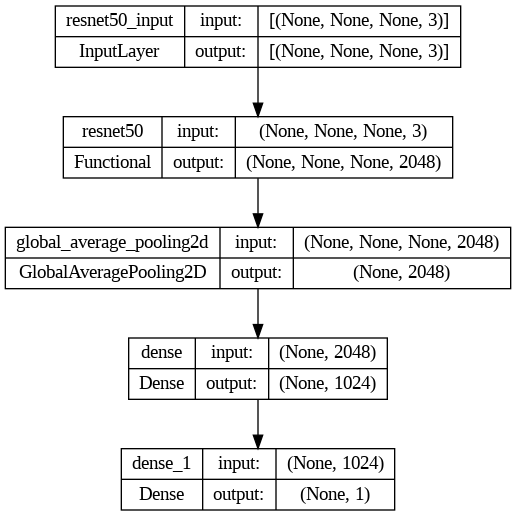

In [ ]:
from tensorflow.keras.models import load_model

# Replace 'your_model.h5' with the actual file path of your .h5 file
model = load_model('/content/drive/MyDrive/Abdelrahman_s/Microscopic/2_checkpoint_dataset_1_final_2_F.h5')

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


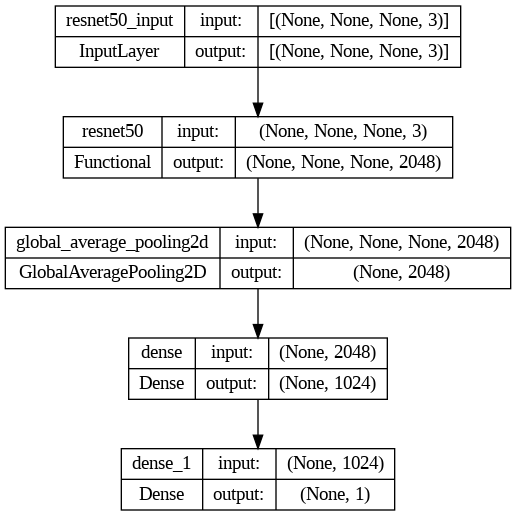

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard

# Load the pre-trained model from the .h5 file
model = load_model('/content/drive/MyDrive/Abdelrahman_s/Microscopic/2_checkpoint_dataset_1_final_2_F.h5')

# Set up TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])
